# Airline Passenger Satisfaction

## Introducción
Se va a realizar un estudio de una encuesta de satisfacción a pasajeros de una aerolínea para crear un modelo de predicción que indique la satisfacción del cliente (Satisfecho, No satisfecho) a partir de la experiencia que proporciona la aerolínea.

A continuación. se mencionan los diferentes campos recogidos por la encuesta:

**Gender:** Género de los pasajeros (Female, Male)  
**Customer Typer:** Tipo de cliente (Loyal customer, disloyal customer)  
**Age:** Edad actual de los pasajeros  
**Type of Travel:** Propósito del viaje de los pasajeros (Personal Travel, Business Travel)  
**Class:** Clase de asiento del vuelo de los pasajeros (Business, Eco, Eco Plus)  
**Flight distance:** Distancia de vuelo de cada pasajero  
**Inflight wifi service:** Nivel de satisfacción del servicio wifi del vuelo (0:Not Applicable;1-5)  
**Departure/Arrival time convenient:** Nivel de satisfacción de la conveniencia de la hora de llegada y de salida (0: not rated; 1-5)  
**Ease of Online booking:** Nota de satisfacción de la reserva online (0: not rated; 1-5)  
**Gate location:** Nivel de satisfacción de puerta de embarque (0: not rated; 1-5)  
**Food and drink:** Nivel de satisfacción de la comida y bebida (0: not rated; 1-5)  
**Online boarding:** Nivel de satisfacción del embarque online (0: not rated; 1-5)  
**Seat comfort:** Nivel de satisación del confort del asiento (0: not rated; 1-5)  
**Inflight entertainment:** Nivel de satisfacción del entretenimiento durante el vuelo (0: not rated; 1-5)  
**On-board service:** Nivel de satisfacción del servicio a bordo (0: not rated; 1-5)  
**Leg room service:** Nivel de satisfacción del espacio para las piernas (0: not rated; 1-5)  
**Baggage handling:** Nivel de satisfacción del manejo del equipaje (0: not rated; 1-5)  
**Check-in service:** Nivel de satisfacción del servicio de check-in (0: not rated; 1-5)  
**Inflight service** Nivel de satisfacción del servicio durante el vuelo (0: not rated; 1-5)  
**Cleanliness:** Nivel de satisfacción de la limpieza (0: not rated; 1-5)  
**Departure Delay in Minutes:** Retraso de salida en minutos  
**Arrival Delay in Minutes:** Retraso de llegada en minutos  
**Satisfaction:** Nivel de satisfacción de la aerolinínea (Satisfaction, neutral or dissatisfaction)  

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
DataTrain = pd.read_csv("~/Documentos/Fundamentos/Practica_1/train.csv")
DataTest = pd.read_csv("~/Documentos/Fundamentos/Practica_1/test.csv")

# EDA

## Resumen estadístico

In [96]:
print('Cantidad de filas y columnas: ',DataTrain.shape)

Cantidad de filas y columnas:  (103904, 25)


In [29]:
print('Nombre de columnas: ', DataTrain.columns)

Nombre de columnas:  Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [39]:
DataTrain.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


En primer lugar vamos a tomar una muestra aleatoria de nuestro dataframe que sea mas manejable

In [97]:
DataMuestra = DataTrain.sample(n=5000, random_state=1)

In [9]:
DataMuestra.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
65830,65830,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,...,5,4,3,3,5,5,5,0,0.0,satisfied
41026,41026,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,...,1,4,3,3,1,4,1,17,17.0,neutral or dissatisfied
95867,95867,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,...,1,5,4,4,5,5,1,0,0.0,neutral or dissatisfied
75679,75679,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,...,3,2,5,5,3,1,3,0,0.0,neutral or dissatisfied
52958,52958,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,...,5,3,5,4,3,5,5,0,0.0,neutral or dissatisfied


In [10]:
DataMuestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 65830 to 88458
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         5000 non-null   int64  
 1   id                                 5000 non-null   int64  
 2   Gender                             5000 non-null   object 
 3   Customer Type                      5000 non-null   object 
 4   Age                                5000 non-null   int64  
 5   Type of Travel                     5000 non-null   object 
 6   Class                              5000 non-null   object 
 7   Flight Distance                    5000 non-null   int64  
 8   Inflight wifi service              5000 non-null   int64  
 9   Departure/Arrival time convenient  5000 non-null   int64  
 10  Ease of Online booking             5000 non-null   int64  
 11  Gate location                      5000 non-null   

In [11]:
DataMuestra.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,51693.821800,29920.616987,6.0,25759.75,51257.0,77675.5,103898.0
id,5000.0,64291.955800,37330.143231,6.0,31694.25,64368.5,96514.5,129852.0
Age,5000.0,39.335200,15.206442,7.0,27.00,39.0,51.0,80.0
Flight Distance,5000.0,1188.962200,993.620264,67.0,419.00,846.0,1744.0,4963.0
Inflight wifi service,5000.0,2.737400,1.317873,0.0,2.00,3.0,4.0,5.0
Departure/Arrival time convenient,5000.0,3.046000,1.521429,0.0,2.00,3.0,4.0,5.0
Ease of Online booking,5000.0,2.773600,1.392814,0.0,2.00,3.0,4.0,5.0
Gate location,5000.0,2.973600,1.281886,1.0,2.00,3.0,4.0,5.0
Food and drink,5000.0,3.193400,1.316185,0.0,2.00,3.0,4.0,5.0
Online boarding,5000.0,3.251800,1.339834,0.0,2.00,3.0,4.0,5.0


## Tratamiento de datos

Las primeras 2 columnas no son necesarias para el estudio asi que las vamos a eliminar.

In [98]:
DataMuestra = DataMuestra.drop(['Unnamed: 0', 'id'], axis=1)

In [32]:
DataMuestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 65830 to 88458
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5000 non-null   object 
 1   Customer Type                      5000 non-null   object 
 2   Age                                5000 non-null   int64  
 3   Type of Travel                     5000 non-null   object 
 4   Class                              5000 non-null   object 
 5   Flight Distance                    5000 non-null   int64  
 6   Inflight wifi service              5000 non-null   int64  
 7   Departure/Arrival time convenient  5000 non-null   int64  
 8   Ease of Online booking             5000 non-null   int64  
 9   Gate location                      5000 non-null   int64  
 10  Food and drink                     5000 non-null   int64  
 11  Online boarding                    5000 non-null   

Vamos a cambiar los 0 de la encuesta (Not rated) y convertirlos en NA, excepto en la columna 'Inflight wifi service', la cual los 0 son no aplicable (Not Applicable).

In [99]:
DataMuestra[DataMuestra.columns[7:20]] = DataMuestra[DataMuestra.columns[7:20]].replace([0], [np.nan])

A continuación, vamos a ver los datos faltantes que tiene el dataframe

In [100]:
DataMuestra.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient    243
Ease of Online booking               201
Gate location                          0
Food and drink                         3
Online boarding                      113
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                      23
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes              20
satisfaction                           0
dtype: int64

Vemos que tenemos faltantes en varias columnas y que son pocos en comparación con los datos del dataframe, asi que vamos a sustituir los valores faltantes por la mediana de los datos de esas columnas.

In [101]:
DataMuestra['Departure/Arrival time convenient'] = DataMuestra['Departure/Arrival time convenient'].fillna(DataTrain['Departure/Arrival time convenient'].median())
DataMuestra['Ease of Online booking'] = DataMuestra['Ease of Online booking'].fillna(DataTrain['Ease of Online booking'].median())
DataMuestra['Food and drink'] = DataMuestra['Food and drink'].fillna(DataTrain['Food and drink'].median())
DataMuestra['Online boarding'] = DataMuestra['Online boarding'].fillna(DataTrain['Online boarding'].median())
DataMuestra['Leg room service'] = DataMuestra['Leg room service'].fillna(DataTrain['Leg room service'].median())
DataMuestra['Arrival Delay in Minutes'] = DataMuestra['Arrival Delay in Minutes'].fillna(DataTrain['Arrival Delay in Minutes'].median())

In [102]:
DataMuestra.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [103]:
DataMuestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 65830 to 88458
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5000 non-null   object 
 1   Customer Type                      5000 non-null   object 
 2   Age                                5000 non-null   int64  
 3   Type of Travel                     5000 non-null   object 
 4   Class                              5000 non-null   object 
 5   Flight Distance                    5000 non-null   int64  
 6   Inflight wifi service              5000 non-null   int64  
 7   Departure/Arrival time convenient  5000 non-null   float64
 8   Ease of Online booking             5000 non-null   float64
 9   Gate location                      5000 non-null   int64  
 10  Food and drink                     5000 non-null   float64
 11  Online boarding                    5000 non-null   

Una vez tratados los NA, observamos que en algunas variables de puntuación ha cambiado el tipo de dato a float por lo que vamos a modificar el tipo de dato a tipo int64.

In [104]:
Columnas_encuesta =list(range(6,20))
DataMuestra.iloc[:,Columnas_encuesta] = DataMuestra.iloc[:,Columnas_encuesta].astype('int64')

In [105]:
DataMuestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 65830 to 88458
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5000 non-null   object 
 1   Customer Type                      5000 non-null   object 
 2   Age                                5000 non-null   int64  
 3   Type of Travel                     5000 non-null   object 
 4   Class                              5000 non-null   object 
 5   Flight Distance                    5000 non-null   int64  
 6   Inflight wifi service              5000 non-null   int64  
 7   Departure/Arrival time convenient  5000 non-null   int64  
 8   Ease of Online booking             5000 non-null   int64  
 9   Gate location                      5000 non-null   int64  
 10  Food and drink                     5000 non-null   int64  
 11  Online boarding                    5000 non-null   

# Visualización

### Estudiamos la variable objetivo(target)

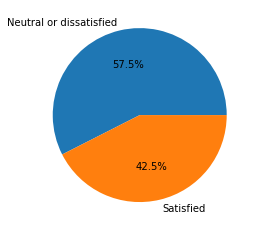

In [106]:
plt.pie(DataMuestra.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')
pass

Vemos que el 57,5% de los clientes estan insatisfechos o neutrales mientras que el 42,5% estan satisfechos.

### Ahora vamos a estudiar el resto de variables cualitativas

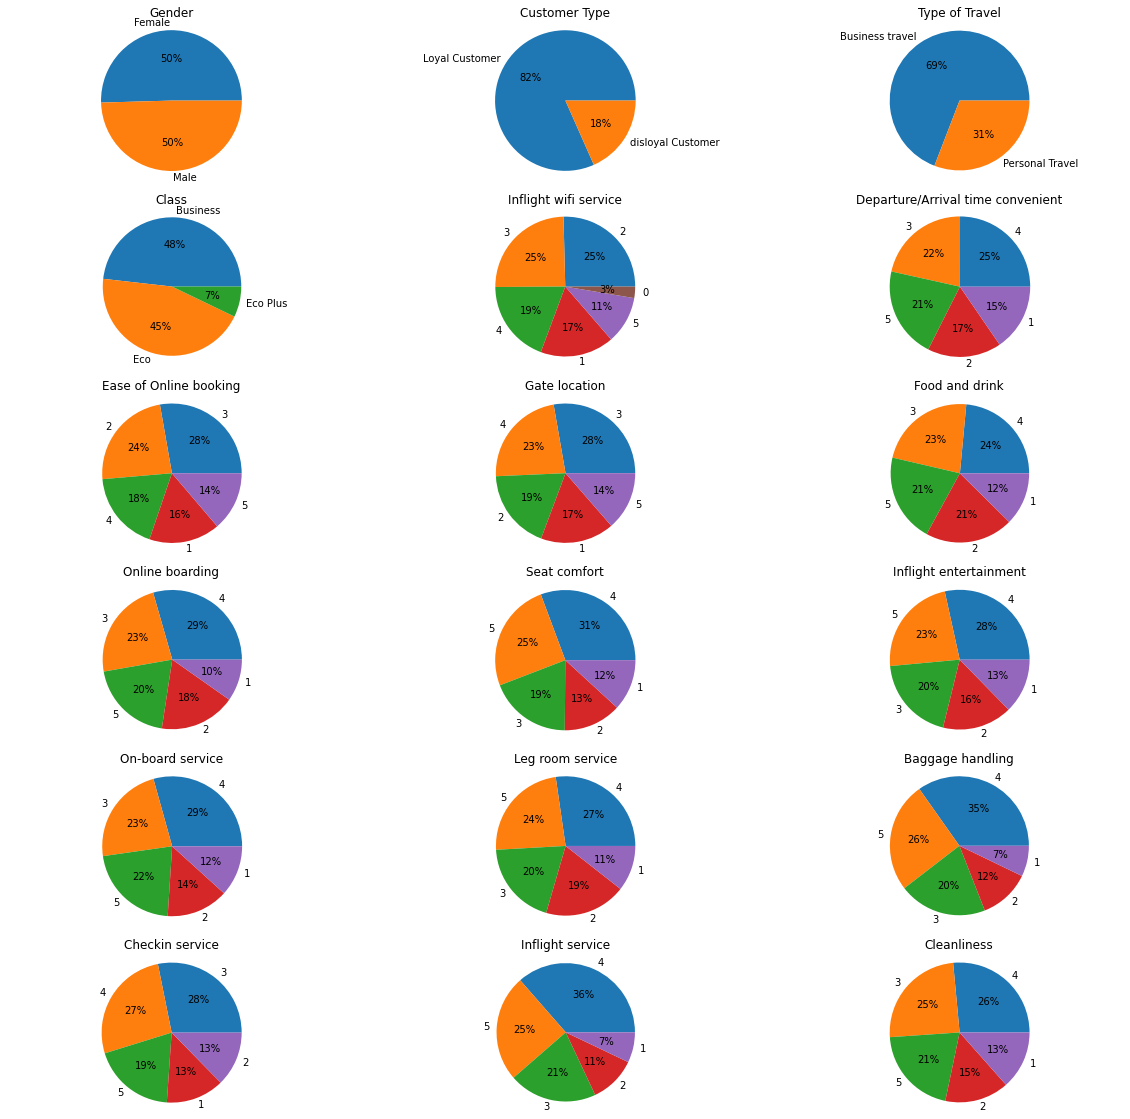

In [79]:
Columnas_categoria = [0,1,3,4] + list(range(6,20))
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(DataMuestra.iloc[:,Columnas_categoria]):
    column_values = DataMuestra[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, autopct = '%1.0f%%')
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Algunas conclusiones que podemos sacar de estas variables son:
+ Hay el mismo número de mujeres que de hombres.
+ El 82% de los clientes son leales.
+ Alrededor de dos tercios de los pasajeros vuelan por negocios.
+ Casi la mitad de los clientes vuelan en Bussiness, un 45% en clase Eco y solo un 7% en clase Eco Plus.
+ Solo un 3% de los clientes no contaron con servicio wifi durante su vuelo.
+ Las puntuaciones de cada servicio son diversas siendo un 4 la nota mas común en todos los servicios.

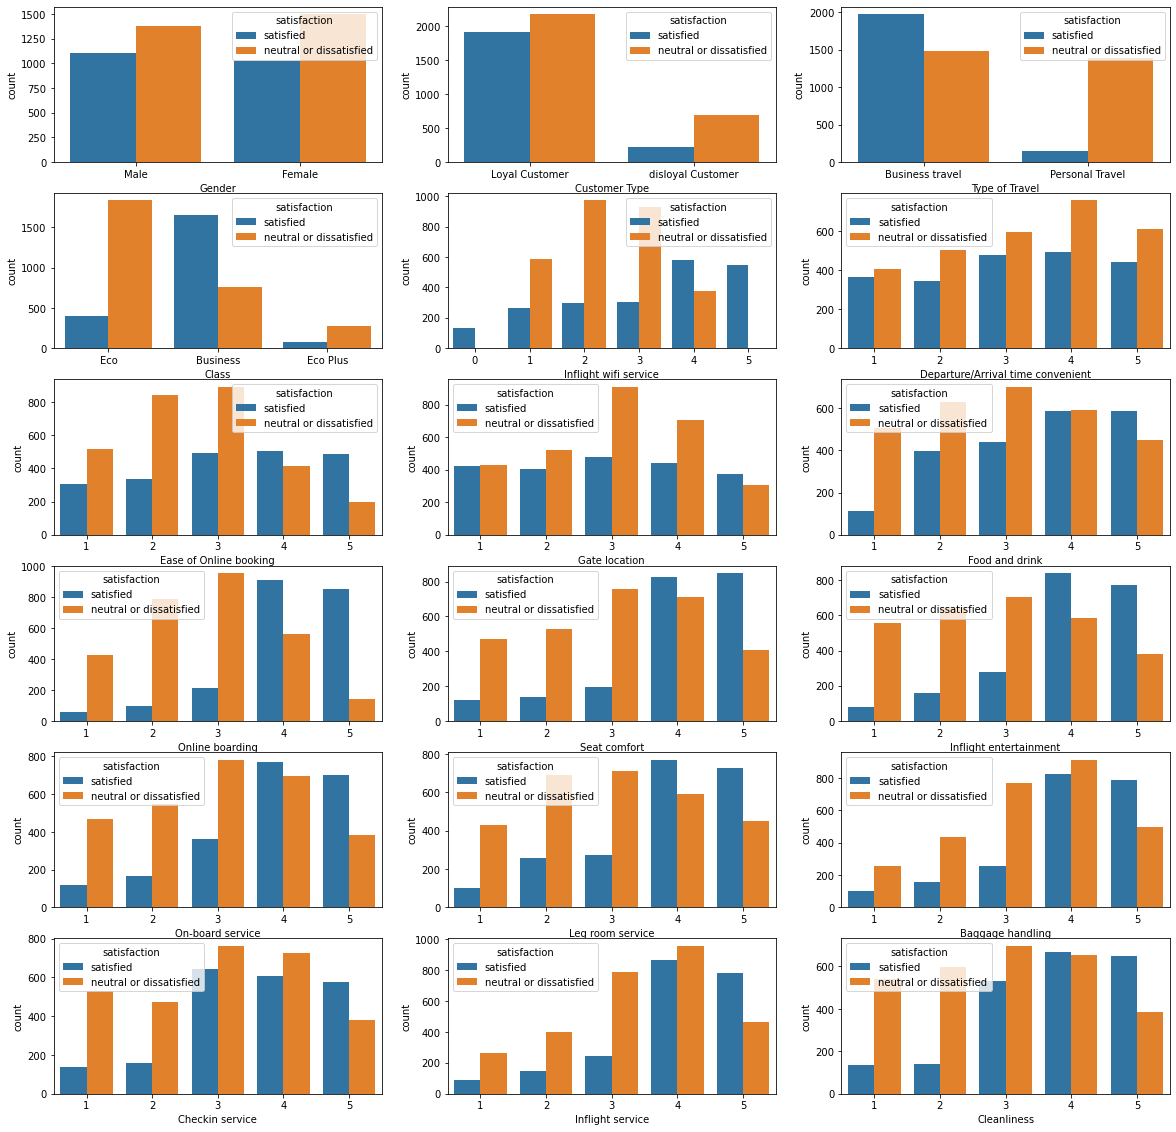

In [82]:
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(DataMuestra.iloc[:,Columnas_categoria]):
    sns.countplot(data=DataMuestra, x=col, hue='satisfaction', ax=axes[i//3, i%3])
plt.show()

Algunas conclusiones que podemos sacar de estos gráficos son:
+ El nivel de satisfacción no depende del género del cliente
+ El porcentaje de satisfechos en clientes leales es de alrededor del 45% mientras que en clientes no leales es de apenas el 30%.
+ Las personas que viajan por trabajo tienden a estar más satisfechas mientras que las personas que viajan por motivos personales son muy propensas a estar insatisfechas o neutrales. 
+ Dos tercios de las personas que viajan en clase business estan satisfechas mientras que las peronas que viajan en clase eco o eco plus tienden a estar insatisfechas o neutrales.
+ Las personas que no contaron con servicio wifi durante el vuelo estan satisfechas
+ Las personas que puntuaron con un 5 alguno de los servicios del viaje tienden a estar satisfechas siendo más evidente en el caso del servicio wifi y del embarco online.
+ Las personas que puntuaron de 1-3 los servicios del viaje son propensas a estar insatisfechas o neutrales.

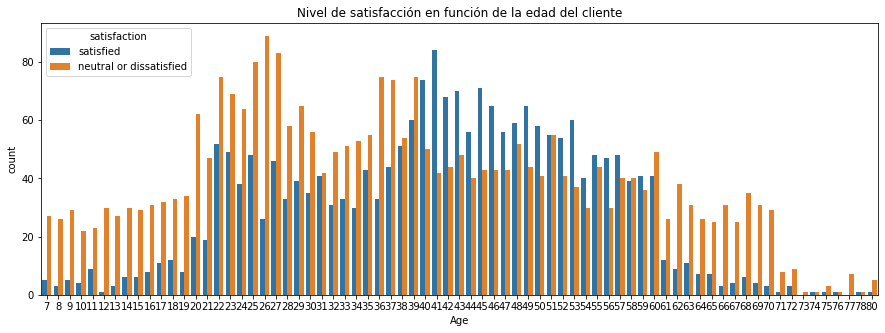

In [76]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=DataMuestra, x='Age', hue='satisfaction', ax=ax).set(title='Nivel de satisfacción en función de la edad del cliente')
pass

Los clientes que tienen entre 40 y 59 años son más propensos a estar satisfechos que el resto.

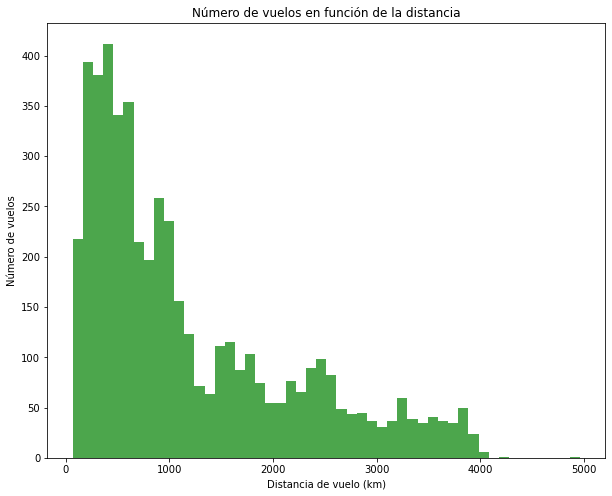

In [75]:
f, ax = plt.subplots(figsize=(10, 8))
plt.hist(data=DataMuestra, x='Flight Distance', bins=50, color='green', alpha=0.7)
plt.title('Número de vuelos en función de la distancia')
plt.xlabel('Distancia de vuelo (km)')
plt.ylabel('Número de vuelos')
pass

La mayoría de los vuelos son de una distancia inferior a 1000 km.

<AxesSubplot:>

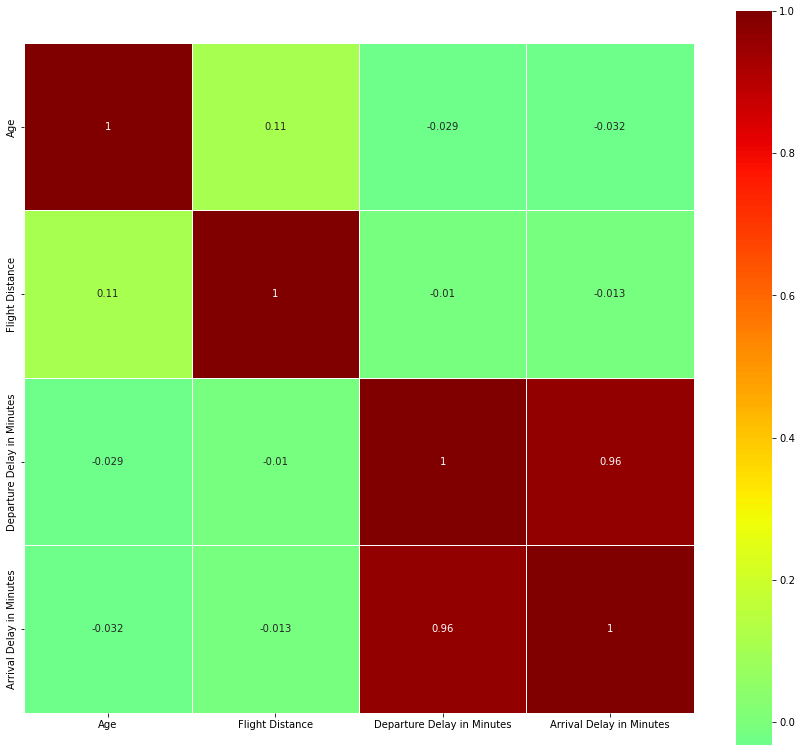

In [26]:
DataMuestra_corr=DataMuestra.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(DataMuestra_corr, cmap='jet', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Regresión lineal múltiple

In [84]:
X_multiple=DataMuestra[['Departure Delay in Minutes', 'Flight Distance']]
y_multiple=DataMuestra['Arrival Delay in Minutes']
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)
linear_model.score(X_train, y_train)
y_predict=linear_model.predict(X_test)
r2_score(y_test, y_predict)

0.9285753883935058

In [85]:
linear_model.coef_

array([ 9.87900931e-01, -9.60715320e-05])

In [86]:
X_multiple=DataMuestra[['Departure Delay in Minutes']]
y_multiple=DataMuestra['Arrival Delay in Minutes']
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)
linear_model.score(X_train, y_train)
y_predict=linear_model.predict(X_test)
r2_score(y_test, y_predict)

0.9300829864506357

In [87]:
linear_model.coef_

array([0.97143871])